# 1. Import de bibliotecas

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Leitura do Dataset

In [3]:
exercise = sns.load_dataset("exercise", index_col=0)
exercise.set_index("id", inplace=True)

In [4]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85,1 min,rest
1,low fat,85,15 min,rest
1,low fat,88,30 min,rest
2,low fat,90,1 min,rest
2,low fat,92,15 min,rest


# 3. Limpeza dos dados

## 3.1 Checando dados faltantes

In [7]:
exercise.isnull().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

O dataset exercise não possui valores faltantes para serem limpos. Para tons educativos iremos fazer valores faltantes artificiais:

In [26]:
exercise.iloc[:1,2:3] = None
exercise.iloc[3:4,1:2] = None

In [27]:
exercise.isnull().sum()

diet     0
pulse    1
time     1
kind     0
dtype: int64

In [29]:
exercise.head()

,diet,pulse,time,kind
id,,,,
1,low fat,85.0,NaN,rest
1,low fat,85.0,15 min,rest
1,low fat,88.0,30 min,rest
2,low fat,NaN,1 min,rest
2,low fat,92.0,15 min,rest


Por regra de negócio, como todas as pessoas começam seu ID com time = 1 min, colocaremos no primeiro valor 1 min.

In [30]:
exercise.iloc[:1,2:3] = '1 min'

Para a coluna pulse, iremos utilizar o Simple imputer do sklearn.

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(exercise[['pulse']])

exercise['pulse'] = imputer.transform(exercise[['pulse']])

exercise.isnull().sum()

diet     0
pulse    0
time     0
kind     0
dtype: int64

Não temos mais dados faltantes no Dataset

## 3.3 Checando outliers

<Axes: xlabel='pulse'>

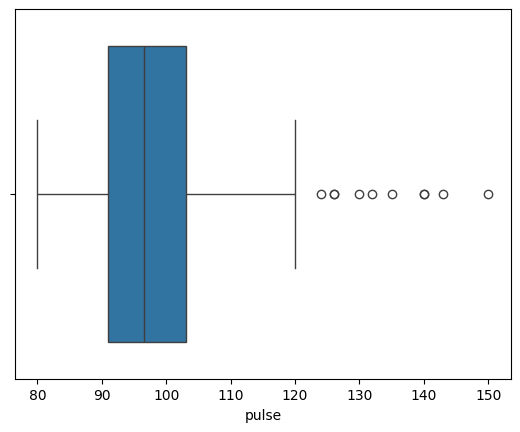

In [33]:
sns.boxplot(exercise, x='pulse')

In [34]:
exercise.query('pulse > 120')

,diet,pulse,time,kind
id,,,,
24,low fat,132.0,15 min,running
26,no fat,126.0,15 min,running
26,no fat,143.0,30 min,running
27,no fat,126.0,15 min,running
27,no fat,140.0,30 min,running
28,no fat,124.0,15 min,running
28,no fat,140.0,30 min,running
29,no fat,135.0,15 min,running
29,no fat,130.0,30 min,running


No dataset encontramos outliers, no entanto, cabe dizer que por mais que sejam outliers são dados confiáveis de sensores. As amostras marcadas como outliers são de pessoas que estavam sendo submetidas a regimes de treinamentos intensos de mais de 15 minutos. Logo, não podemos considerar esses dados como discrepantes, visto que são dados reais. Escolheremos mante-los.

# 4 Codificação de variáveis

Para as variáveis categóricas temos 3: Diet, Time e Kind. Podemos analisar as colunas Diet e Kind como variáveis categoricas. Time iremos converter em uma coluna numérica.

In [35]:
exercise_encoded = pd.get_dummies(exercise, columns=['diet', 'kind'])

In [36]:
exercise_encoded

,pulse,time,diet_no fat,diet_low fat,kind_rest,kind_walking,kind_running
id,,,,,,,
1,85.000000,1 min,False,True,True,False,False
1,85.000000,15 min,False,True,True,False,False
1,88.000000,30 min,False,True,True,False,False
2,99.808989,1 min,False,True,True,False,False
2,92.000000,15 min,False,True,True,False,False
...,...,...,...,...,...,...,...
29,135.000000,15 min,True,False,False,False,True
29,130.000000,30 min,True,False,False,False,True
30,99.000000,1 min,True,False,False,False,True


In [37]:
import re
def extract_minutes(time_str):
    minutes = re.search(r'\d+', time_str).group()
    return int(minutes)

exercise_encoded['time'] = exercise_encoded['time'].apply(extract_minutes)


         pulse time  diet_no fat  diet_low fat  kind_rest  kind_walking  \
id                                                                        
1    85.000000    1        False          True       True         False   
1    85.000000   15        False          True       True         False   
1    88.000000   30        False          True       True         False   
2    99.808989    1        False          True       True         False   
2    92.000000   15        False          True       True         False   
..         ...  ...          ...           ...        ...           ...   
29  135.000000   15         True         False      False         False   
29  130.000000   30         True         False      False         False   
30   99.000000    1         True         False      False         False   
30  111.000000   15         True         False      False         False   
30  150.000000   30         True         False      False         False   

    kind_running  
id   

In [38]:
exercise_encoded

,pulse,time,diet_no fat,diet_low fat,kind_rest,kind_walking,kind_running
id,,,,,,,
1,85.000000,1,False,True,True,False,False
1,85.000000,15,False,True,True,False,False
1,88.000000,30,False,True,True,False,False
2,99.808989,1,False,True,True,False,False
2,92.000000,15,False,True,True,False,False
...,...,...,...,...,...,...,...
29,135.000000,15,True,False,False,False,True
29,130.000000,30,True,False,False,False,True
30,99.000000,1,True,False,False,False,True


Dessa maneira terminamos o tratamento de dados e estamos prontos para utilizar algoritmos de Machine Learning.